## Bias-Variance Tradeoff (Overfitting vs Underfitting)

**Underfitting** apare atunci când modelul este prea simplu și nu reușește să capteze relațiile din date. Modelul are performanță slabă atât pe setul de antrenament, cât și pe setul de test.

Caracteristici:

    -   Training error: mare

    -   Test error: mare

    -   High Bias

    -   Low Variance

**Overfitting** apare atunci când modelul este prea complex și învață inclusiv zgomotul din datele de antrenament. Modelul performează foarte bine pe training, dar nu generalizează pe date noi.

Caracteristici:

    -   Training error: foarte mic

    -   Test error: mare

    -   Low Bias

    -   High Variance

-  **Underfitting = High Bias & Low Variance**

-   **Overfitting = Low Bias & High Variance**

### Evaluation Metrics for Classification

In [1]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

X = data['data']
y = data['target']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
forest = RandomForestClassifier()

In [4]:
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [5]:
forest.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [6]:
knn.score(X_test, y_test) # accuracy

0.9689680989303202

In [7]:
forest.score(X_test, y_test) # accuracy

0.9546311196784937

### Accuracy

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- La ce intrebare raspunde metrica asta:
  
    -   **What fraction of my predictions are correct?**

Deci iau predictiile corecte si impart la numarul total de predictii, si obtin o proportie care arata ce procent din predictii sunt corecte

In [8]:
y_pred_knn = knn.predict(X_test)
y_pred_forest = forest.predict(X_test)

In [9]:
acc_knn = sum(y_pred_knn == y_test) / len(y_pred_knn)
acc_forest = sum(y_pred_forest == y_test) / len(y_pred_forest)

print(f"Acc KNN: {acc_knn}")
print(f"Acc RF: {acc_forest}")

Acc KNN: 0.9689680989303202
Acc RF: 0.9546311196784937


### Confusion Matrix

-   Mai mult pe partea de vizualizare:

    -   Vezi clar ce clase au fost clasificate gresit 

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
cm_knn = confusion_matrix(y_pred_knn, y_test)
cm_forest = confusion_matrix(y_pred_forest, y_test)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

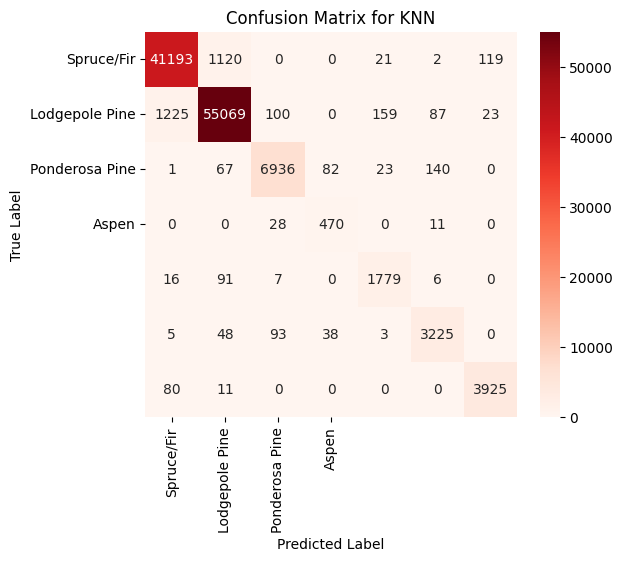

In [13]:
labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Aspen']
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

### Precision

$Precision = \frac{TP}{TP + FP}$

-   **When I say Yes(Positive) how often am i correct about this**

Deci ma intereseaza atunci cand clasific drept Positive ce procent din clasificarile cu Positive sunt corecte

Pe scurt: **How often is my Yes correct**

In [14]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X, y = data['data'], data['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)

In [17]:
tree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",7
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [18]:
y_pred_tree = tree.predict(X_test)

In [19]:
from sklearn.metrics import precision_score

TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
FP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 1])

precision_tree = TP / (TP + FP)

print(precision_tree)
print(f"Cu sklearn: {precision_score(y_test, y_pred_tree)}")

0.958904109589041
Cu sklearn: 0.958904109589041


### Recall

$Recall = \frac{TP}{TP + FN}$

-   **Out of all the positive instances how many can i find**

- Daca zic ca toate sample urile sunt Positive o sa am Recall 100%, dar clar Precision o sa fie foarte mica pentru ca am clasificat gresit pe cele care nu sunt Positive

In [20]:
from sklearn.metrics import recall_score

TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
FN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 0])

recall_tree = TP / (TP + FN)

print(recall_tree)
print(f"Cu sklearn: {recall_score(y_test, y_pred_tree)}")

0.9459459459459459
Cu sklearn: 0.9459459459459459


### F1 Score

$F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$

F1 Score combina Precision si Recall:

    -   Ca F1 Score sa fie buna ambele Precision si Recall trebuie sa fie bune

-   Daca una este buna si cealalta nu este deloc buna, atunci F1 Score o sa fie mic, AMBELE METRICI TREBUIE SA FIE BUNE


In [21]:
from sklearn.metrics import f1_score

f1_tree = (2 * precision_tree * recall_tree) / (precision_tree + recall_tree)

print(f1_tree)
print(f"Cu sklearn: {f1_score(y_test, y_pred_tree)}")

0.9523809523809523
Cu sklearn: 0.9523809523809523


### Other Confusion Matrix Metrics

In [22]:
TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
TN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 0])
FP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 1])
FN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 0])


# Sensitivity = Recall, hit rate, true positive rate
# What percentage of positive instances did we recognise as positive ?
TPR = TP / (TP + FN)

# Specificity, true negative rate
# What percentage of negative instances did we recognise as negative
TNR = TN / (TN + FP)

# Precision, positive predictive value
# When we classify smth as positive, how often is it actually true ?
PPV = TP / (TP + FP)

# Negative predictive value
# When we classify smth as negative, how often is it actually true ?
NPV = TN / (TN + FN)

# Fallout, false positive rate
# What percentage of negative instances did we missclasify as positve ?
FPR = FP / (FP + TN)

# False discovery rate
# When we classify smth as positive, how often are we wrong about that ?
FDR = FP / (TP + FP)

# False omission rate
# When we classify smth as negative, how often are we wrong about that ?
FOR = FN / (FN + TN)

### ROC & ROC-AUC

$AUC = \sum (width of FPR interval) \times (height of TPR)$

-   Foloseste **TPR** si **FPR**


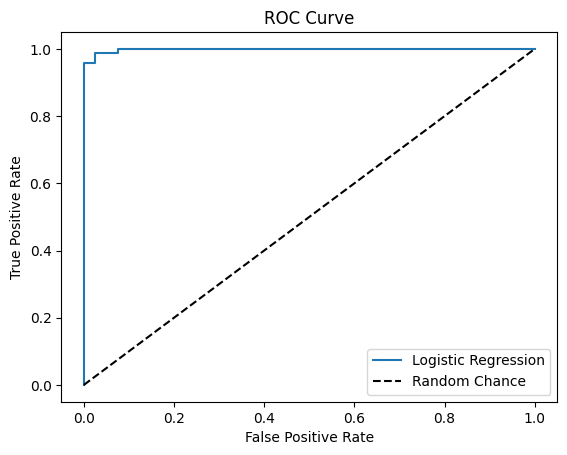

ROC-AUC Score: 1.00


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Diagonala
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")